# Inference on a pretrained network in Keras

Let's practise with model inference.

We are going to use Tensorflow 2.x, which includes Keras as a module.

(c) Manuel Jesús Marín-Jiménez / Universidad de Córdoba



In [ ]:
# Download a test image
#url = "https://www.collinsdictionary.com/images/full/fruit_163436567.jpg"
#url = "https://www.insitudiario.es/wp-content/uploads/2020/10/WhatsApp-Image-2020-10-16-at-12.59.11.jpeg"
#url = "https://images.immediate.co.uk/production/volatile/sites/30/2020/08/recipe-image-legacy-id-1001491_11-2e0fa5c.jpg"
url = "https://imagenes.20minutos.es/files/image_656_370/uploads/imagenes/2022/02/08/bichon-maltes-1.jpeg"
!wget {url} -O foto.jpg

--2022-05-22 20:41:33--  https://imagenes.20minutos.es/files/image_656_370/uploads/imagenes/2022/02/08/bichon-maltes-1.jpeg
Resolving imagenes.20minutos.es (imagenes.20minutos.es)... 108.156.60.31, 108.156.60.22, 108.156.60.79, ...
Connecting to imagenes.20minutos.es (imagenes.20minutos.es)|108.156.60.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53112 (52K) [image/jpeg]
Saving to: ‘foto.jpg’

foto.jpg            100%[===================>]  51.87K  --.-KB/s    in 0.004s  

2022-05-22 20:41:34 (13.1 MB/s) - ‘foto.jpg’ saved [53112/53112]



In [ ]:
# Check that the image is downloaded
!ls /content/*.jpg

/content/foto.jpg


In [ ]:
# Import the basic libraries needed to start working
import cv2
from google.colab.patches import cv2_imshow  # This is a patch for Google Colab
import numpy as np  # Quite useful

The inference, or forward-pass, is the process where the image is processed through the different layers of the network, starting from the input layer until the output layer is reached.  
In a classification model, the ouput provides the probability of the image to belong to each of the possible categories.

In [ ]:
# Let's use a pretrained network to classify images
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

# Grab a model predefined in Keras: VGG16
model = VGG16(weights='imagenet')

# TODO: analiza el modelo que estás usando, considera usar la función summary()


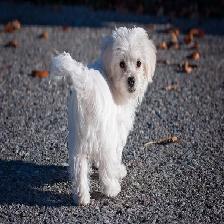

Predicted: [('n02085936', 'Maltese_dog', 0.4929062), ('n02113624', 'toy_poodle', 0.0826606), ('n02113712', 'miniature_poodle', 0.07850547), ('n02097474', 'Tibetan_terrier', 0.039085593), ('n02098413', 'Lhasa', 0.03842671), ('n02098105', 'soft-coated_wheaten_terrier', 0.023135506), ('n02088094', 'Afghan_hound', 0.020282716), ('n02111500', 'Great_Pyrenees', 0.016557837), ('n02098286', 'West_Highland_white_terrier', 0.016432682), ('n02096437', 'Dandie_Dinmont', 0.013204346)]


In [ ]:
# Realizamos las predicciones
# Our target image
img_path = '/content/foto.jpg'

# Let's read the image with Keras functions
img = image.load_img(img_path, target_size=(224, 224))

# Let's convert the image into a 'tensor'
x0 = image.img_to_array(img)
cv2_imshow(cv2.cvtColor(x0, cv2.COLOR_RGB2BGR)) # Visualize

x = np.expand_dims(x0, axis=0)

# This network needs to apply initial transformations to the target image
x = preprocess_input(x)

# We now ask the model to predict its labels -> classification
preds = model.predict(x)

# We use a function associated with the model to get the names of classes
print('Predicted:', decode_predictions(preds, top=10)[0])

# QUESTION: is it classifying the image content correctly?

## Exercise: use your own images to test the model

How many different categories are supported by this model?  
TIP: check the length of the output layer.